<a href="https://colab.research.google.com/github/Varun-Singhal/Neural-Network/blob/master/GestureClassificationDenseNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pickle 
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Input, Flatten, Dropout, Convolution2D, Activation
from keras.models import Sequential
from tensorflow import one_hot
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open("/content/drive/My Drive/dnn.pickle","rb") as file:
  data = pickle.load(file)

In [0]:
train_x = data['data'].T
train_y = data['target']

In [39]:
print(train_x)

[[0.33333333 0.33333333 0.2627451  ... 0.34901961 0.38431373 0.67058824]
 [0.28627451 0.30196078 0.25882353 ... 0.35294118 0.38431373 0.68627451]
 [0.34901961 0.32941176 0.25098039 ... 0.41960784 0.45882353 0.74509804]
 ...
 [0.31372549 0.29803922 0.23529412 ... 0.35686275 0.39215686 0.66666667]
 [0.37647059 0.32156863 0.25882353 ... 0.34509804 0.4        0.68627451]
 [0.30588235 0.33333333 0.23137255 ... 0.34901961 0.40392157 0.69803922]]


In [34]:
print(train_x.shape,train_y.shape)

(147, 30000) (147, 1)


In [0]:
y = one_hot(train_y, depth=3)
with tf.Session() as sess:
    y_train = sess.run(y)


In [70]:
y_train = y_train.reshape(147,3)
print(y_train)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

In [80]:
model = Sequential()
model.add(Dense(70,input_shape = (30000,),activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 70)                2100070   
_________________________________________________________________
dense_88 (Dense)             (None, 90)                6390      
_________________________________________________________________
dense_89 (Dense)             (None, 100)               9100      
_________________________________________________________________
dense_90 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_91 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_92 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_93 (Dense)             (None, 3)                 33        
Total para

In [0]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
print(train_x.shape,y_train.shape)

(147, 30000) (147, 3)


In [83]:
history = model.fit(train_x,y_train,epochs=30)

Epoch 1/30
147/147 [==============================] - 1s 8ms/step - loss: 0.7366 - acc: 0.3197
Epoch 2/30
147/147 [==============================] - 0s 387us/step - loss: 0.6544 - acc: 0.3333
Epoch 3/30
147/147 [==============================] - 0s 409us/step - loss: 0.6379 - acc: 0.3878
Epoch 4/30
147/147 [==============================] - 0s 386us/step - loss: 0.6120 - acc: 0.3333
Epoch 5/30
147/147 [==============================] - 0s 395us/step - loss: 0.5654 - acc: 0.3333
Epoch 6/30
147/147 [==============================] - 0s 393us/step - loss: 0.4955 - acc: 0.4558
Epoch 7/30
147/147 [==============================] - 0s 378us/step - loss: 0.6552 - acc: 0.3061
Epoch 8/30
147/147 [==============================] - 0s 371us/step - loss: 0.5680 - acc: 0.2449
Epoch 9/30
147/147 [==============================] - 0s 384us/step - loss: 0.5161 - acc: 0.3333
Epoch 10/30
147/147 [==============================] - 0s 359us/step - loss: 0.4758 - acc: 0.3878
Epoch 11/30
147/147 [==========

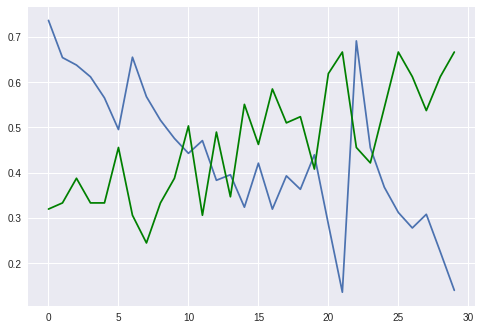

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'],'g')
plt.show()

In [0]:
score = model.evaluate(train_x, y_train, verbose=0)

In [86]:
print(score)

[0.18145311902574943, 0.6666666703159306]
